In [1]:
# Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

In [2]:
# File to Load
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame
olympic_raw = pd.read_csv(olympic_csv)
olympic_raw.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# remove all rows of data for Olympics taking place before the end of WW2 (1945).
olympic_raw_post_war = olympic_raw[olympic_raw.Year > 1945]

# this is our raw dataframe for post ward data.
olympic_raw_post_war.head()

# split dataframe into two separate dataframes by summer and winter games
# this is our dataframe for summer olympic data, post WW2.
summer_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Winter"]
# this is our dataframe for winter olympic data, post WW2.
winter_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Summer"]

In [4]:
len(summer_olympics)

186069

In [5]:
# *** Cleaning Dataset ***
summer_olympics_clean = summer_olympics.loc[summer_olympics["Age"].notna() & summer_olympics["Sex"].notna() &
    summer_olympics["Year"].notna()]
len(summer_olympics_clean)

182967

In [6]:
summer_olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN


In [7]:
summer_olympics_clean["Medal"].fillna("No Medal", inplace = True)
summer_olympics_clean

/Users/ryandickson/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,No Medal
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No Medal
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No Medal
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal


In [8]:
# *** Beginning Gender Analysis ***
pd.crosstab(summer_olympics_clean.Sex, summer_olympics_clean.Medal, margins = True)

Medal,Bronze,Gold,No Medal,Silver,All
Sex,,,,,
F,3036,3001,48416,2991,57444
M,5906,5676,108403,5538,125523
All,8942,8677,156819,8529,182967


In [9]:
summer_sex = pd.DataFrame({
    "Medal":["Gold", "Silver", "Bronze", "No Medal"],
    "Females":[3001, 2991, 3036, 57444],
    "Males":[5676, 5538, 5906, 125523]
})
summer_sex.head()

,Medal,Females,Males
0,Gold,3001,5676
1,Silver,2991,5538
2,Bronze,3036,5906
3,No Medal,57444,125523


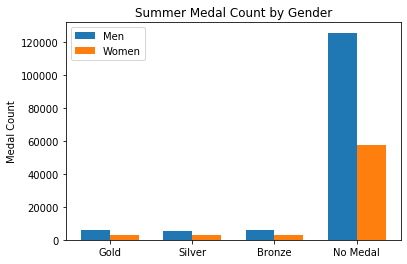

In [10]:
# Summer Medal Count by Gender (includes no medal)

labels = ["Gold", "Silver", "Bronze", "No Medal"]
male_count = [5676, 5538, 5906, 125523]
female_count = [3001, 2991, 3036, 57444]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")

ax.set_ylabel("Medal Count")
ax.set_title("Summer Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("../project1-group1/images/summer_medal_gender.png")
plt.show()

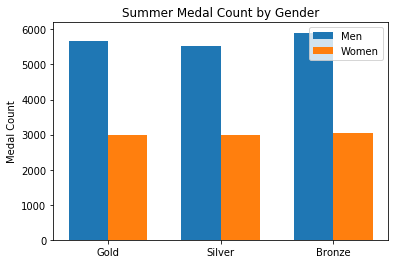

In [11]:
# Summer Medal Count by Gender (excludes no medal)

labels = ["Gold", "Silver", "Bronze"]
male_count = [5676, 5538, 5906]
female_count = [3001, 2991, 3036]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")

ax.set_ylabel("Medal Count")
ax.set_title("Summer Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("../project1-group1/images/summer_medal_gender_nolosers.png")
plt.show()

In [12]:
winter_olympics_clean = winter_olympics.loc[winter_olympics["Age"].notna() & winter_olympics["Sex"].notna() &
    winter_olympics["Year"].notna()]
len(winter_olympics_clean)

46171

In [13]:
winter_olympics_clean["Medal"].fillna("No Medal", inplace = True)
winter_olympics_clean

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


In [14]:
pd.crosstab(winter_olympics_clean.Sex, winter_olympics_clean.Medal, margins = True)

Medal,Bronze,Gold,No Medal,Silver,All
Sex,,,,,
F,588,598,13142,598,14926
M,1167,1162,27753,1163,31245
All,1755,1760,40895,1761,46171


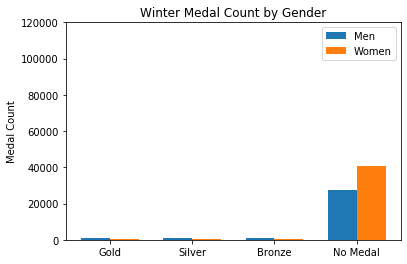

In [15]:
# Winter Medal Count by Gender (includes no medal) set at summer y max

labels = ["Gold", "Silver", "Bronze", "No Medal"]
male_count = [1162, 1163, 1167, 27753]
female_count = [598, 598, 588, 40895]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
plt.ylim(0, 120000)
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("../project1-group1/images/winter_medal_gender_summerscale.png")
plt.show()

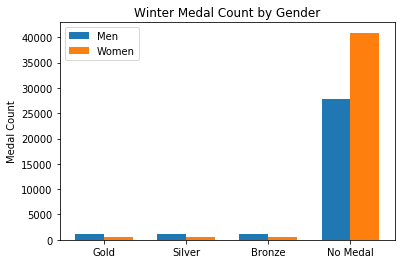

In [16]:
# Winter Medal Count by Gender (includes no medal) set by program
labels = ["Gold", "Silver", "Bronze", "No Medal"]
male_count = [1162, 1163, 1167, 27753]
female_count = [598, 598, 588, 40895]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("../project1-group1/images/summer_medal_gender_programscale.png")
plt.show()

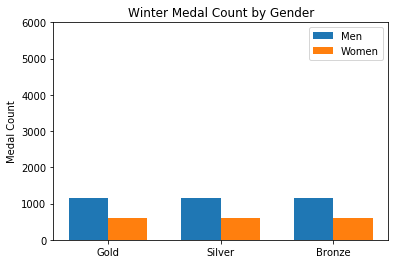

In [17]:
# Winter Medal Count by Gender (excludes no medal) set at summer y max

labels = ["Gold", "Silver", "Bronze"]
male_count = [1162, 1163, 1167]
female_count = [598, 598, 588]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
plt.ylim(0, 6000)
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("../project1-group1/images/winter_medal_gender_nolosers_summerscale.png")
plt.show()

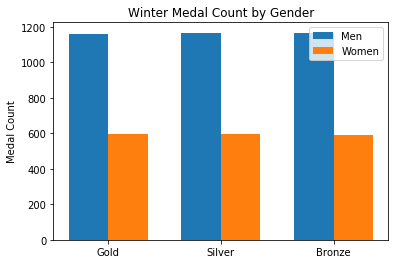

In [18]:
# Winter Medal Count by Gender (excludes no medal) set by program

labels = ["Gold", "Silver", "Bronze"]
male_count = [1162, 1163, 1167]
female_count = [598, 598, 588]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("../project1-group1/images/winter_medal_gender_nolosers_programscale.png")
plt.show()

In [19]:
summer_olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,No Medal
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal


In [20]:
summer_basic = summer_olympics_clean[["Sex", "Year", "Medal"]]
summer_basic.head()

,Sex,Year,Medal
0,M,1992,No Medal
1,M,2012,No Medal
29,M,1952,No Medal
31,M,2000,No Medal
32,F,1996,No Medal


In [21]:
array = ["Bronze", "Silver", "Gold"]
summer_basic_sex = summer_basic.loc[summer_basic["Medal"].isin(array)]
summer_basic_sex.head()

,Sex,Year,Medal
41,M,1948,Bronze
42,M,1948,Gold
44,M,1948,Gold
48,M,1948,Gold
50,M,1952,Bronze


In [22]:
summer_basic_sex.reset_index

<bound method DataFrame.reset_index of        Sex  Year   Medal
41       M  1948  Bronze
42       M  1948    Gold
44       M  1948    Gold
48       M  1948    Gold
50       M  1952  Bronze
...     ..   ...     ...
271078   F  1956  Silver
271080   F  1964  Bronze
271082   M  1980  Bronze
271102   F  2000  Bronze
271103   F  2004  Silver

[26148 rows x 3 columns]>

In [23]:
summer_basic_sex.head()

,Sex,Year,Medal
41,M,1948,Bronze
42,M,1948,Gold
44,M,1948,Gold
48,M,1948,Gold
50,M,1952,Bronze


In [24]:
summer_basic_male = summer_basic_sex.loc[summer_basic_sex["Sex"] == "M"]
summer_basic_male

,Sex,Year,Medal
41,M,1948,Bronze
42,M,1948,Gold
44,M,1948,Gold
48,M,1948,Gold
50,M,1952,Bronze
...,...,...,...
271019,M,2016,Bronze
271046,M,1980,Silver
271048,M,1992,Bronze
271049,M,1996,Gold


In [25]:
summer_basic_male2 = summer_basic_male.groupby("Year")
summer_basic_male2.count()

,Sex,Medal
Year,,
1948,736,736
1952,756,756
1956,737,737
1960,752,752
1964,827,827
1968,840,840
1972,964,964
1976,931,931
1980,950,950


In [26]:
summer_basic_female = summer_basic_sex.loc[summer_basic_sex["Sex"] == "F"]
summer_basic_female

,Sex,Year,Medal
79,F,2008,Gold
91,F,1988,Bronze
105,F,1996,Bronze
161,F,2016,Bronze
163,F,2008,Silver
...,...,...,...
271076,F,1952,Gold
271078,F,1956,Silver
271080,F,1964,Bronze
271102,F,2000,Bronze


In [27]:
summer_basic_female2 = summer_basic_female.groupby("Year")
summer_basic_female2.count()

,Sex,Medal
Year,,
1948,100,100
1952,140,140
1956,143,143
1960,156,156
1964,200,200
1968,215,215
1972,250,250
1976,389,389
1980,434,434


In [28]:
summerframe_df = pd.DataFrame({
    "Males": [736, 756, 737, 752, 827, 840, 964, 931, 950, 981, 1028, 1120, 1078, 1124, 1103, 1116, 1023, 1054],
    "Females": [100, 140, 143, 156, 200, 215, 250, 389, 434, 494, 554, 592, 764, 880, 898, 932, 918, 969],
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
})
summerframe_df

,Males,Females,Year
0,736,100,1948
1,756,140,1952
2,737,143,1956
3,752,156,1960
4,827,200,1964
5,840,215,1968
6,964,250,1972
7,931,389,1976
8,950,434,1980
9,981,494,1984


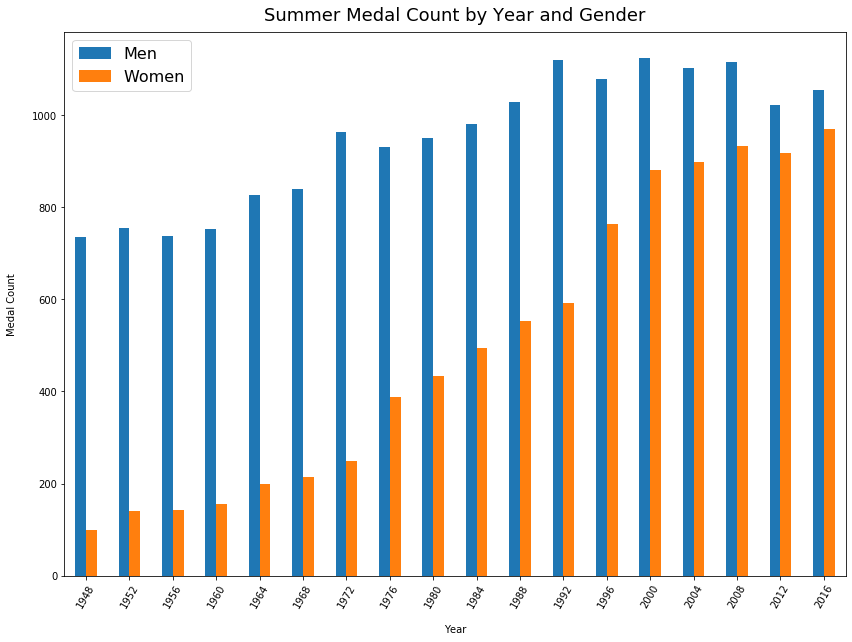

In [29]:
summerframe_df.set_index('Year')[['Males', 'Females']].plot(kind='bar', figsize=(14, 10))
plt.xticks(rotation=60)
plt.title("Summer Medal Count by Year and Gender", fontsize=18, y=1.01)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Medal Count", labelpad=15)
plt.legend(["Men", "Women"], fontsize=16);
plt.savefig("../project1-group1/images/summer_medal_count_year_gender.png")
plt.show()

In [30]:
winter_basic = winter_olympics_clean[["Sex", "Year", "Medal"]]
winter_basic.head()

,Sex,Year,Medal
4,F,1988,No Medal
5,F,1988,No Medal
6,F,1992,No Medal
7,F,1992,No Medal
8,F,1994,No Medal


In [31]:
array = ["Bronze", "Silver", "Gold"]
winter_basic_sex = winter_basic.loc[winter_basic["Medal"].isin(array)]
winter_basic_sex.head()

,Sex,Year,Medal
40,M,2014,Bronze
60,M,1992,Gold
61,M,1992,Bronze
63,M,1994,Silver
64,M,1994,Bronze


In [32]:
winter_counts = winter_basic_sex.groupby(["Sex", "Year"]).count()
print(winter_counts)

          Medal
Sex Year       
F   1948     15
    1952     18
    1956     27
    1960     39
    1964     46
    1968     46
    1972     45
    1976     51
    1980     51
    1984     54
    1988     63
    1992     99
    1994    108
    1998    189
    2002    208
    2006    231
    2010    229
    2014    265
M   1948    120
    1952    118
    1956    123
    1960    108
    1964    140
    1968    153
    1972    154
    1976    160
    1980    167
    1984    168
    1988    200
    1992    219
    1994    223
    1998    251
    2002    270
    2006    295
    2010    291
    2014    332


In [33]:
winterframe_df = pd.DataFrame({
    "Males": [120, 118, 123, 108, 140, 153, 154, 160, 167, 168, 200, 219, 223, 251, 270, 295, 291, 332],
    "Females": [15, 18, 27, 39, 46, 46, 45, 51, 51, 54, 63, 99, 108, 189, 208, 231, 229, 265],
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014]
})
winterframe_df

,Males,Females,Year
0,120,15,1948
1,118,18,1952
2,123,27,1956
3,108,39,1960
4,140,46,1964
5,153,46,1968
6,154,45,1972
7,160,51,1976
8,167,51,1980
9,168,54,1984


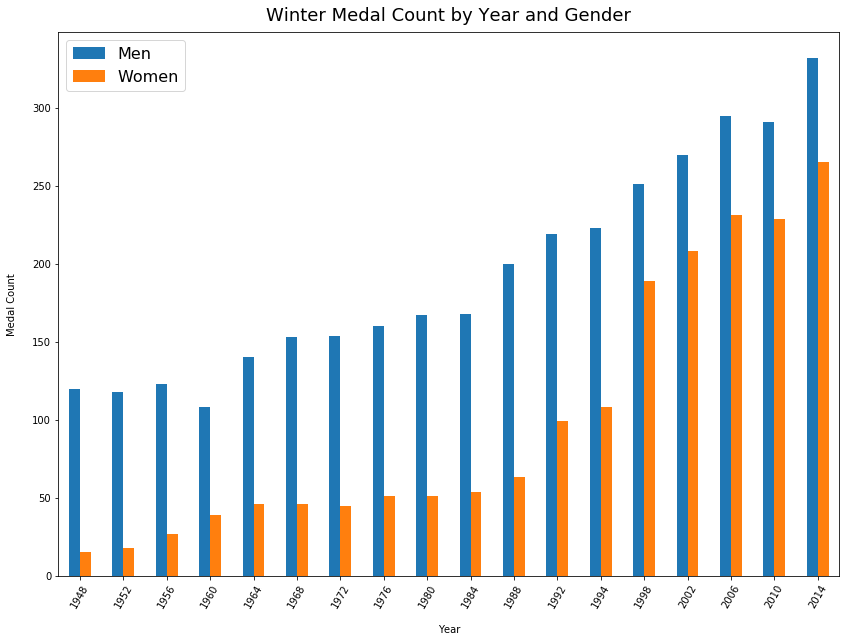

In [34]:
winterframe_df.set_index('Year')[['Males', 'Females']].plot(kind='bar', figsize=(14, 10))
plt.xticks(rotation=60)
plt.title("Winter Medal Count by Year and Gender", fontsize=18, y=1.01)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Medal Count", labelpad=15)
plt.legend(["Men", "Women"], fontsize=16);
plt.savefig("../project1-group1/images/winter_medal_count_year_gender.png")
plt.show()

In [35]:
# *** AGE ANALYSIS ***
summer_olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,No Medal
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal


In [36]:
summer_age = summer_olympics_clean[["Sex", "Age", "Medal"]]
summer_age

,Sex,Age,Medal
0,M,24.0,No Medal
1,M,23.0,No Medal
29,M,26.0,No Medal
31,M,31.0,No Medal
32,F,30.0,No Medal
...,...,...,...
271106,M,27.0,No Medal
271107,M,21.0,No Medal
271108,M,24.0,No Medal
271109,M,28.0,No Medal


In [37]:
summer_age_male = summer_age.loc[summer_age["Sex"] == "M"]
summer_age_male

,Sex,Age,Medal
0,M,24.0,No Medal
1,M,23.0,No Medal
29,M,26.0,No Medal
31,M,31.0,No Medal
41,M,28.0,Bronze
...,...,...,...
271105,M,23.0,No Medal
271106,M,27.0,No Medal
271107,M,21.0,No Medal
271108,M,24.0,No Medal


In [38]:
summer_age_male.groupby(["Medal"]).mean()

,Age
Medal,
Bronze,25.939214
Gold,26.012509
No Medal,25.881046
Silver,26.121705


In [39]:
summer_age_female = summer_age.loc[summer_age["Sex"] == "F"]
summer_age_female

,Sex,Age,Medal
32,F,30.0,No Medal
33,F,34.0,No Medal
79,F,27.0,Gold
80,F,22.0,No Medal
91,F,22.0,Bronze
...,...,...,...
271080,F,33.0,Bronze
271099,F,36.0,No Medal
271102,F,19.0,Bronze
271103,F,23.0,Silver


In [40]:
summer_age_female.groupby(["Medal"]).mean()

,Age
Medal,
Bronze,24.683465
Gold,24.254915
No Medal,23.451008
Silver,24.403544


In [41]:
summerage_df = pd.DataFrame({
    "Males": [26.012509, 26.121705, 25.939214, 25.881046],
    "Females": [24.254915, 24.403544, 24.683465, 23.451008],
    "Medal": ["Gold", "Silver", "Bronze", "No Medal"]
})
summerage_df

,Males,Females,Medal
0,26.012509,24.254915,Gold
1,26.121705,24.403544,Silver
2,25.939214,24.683465,Bronze
3,25.881046,23.451008,No Medal


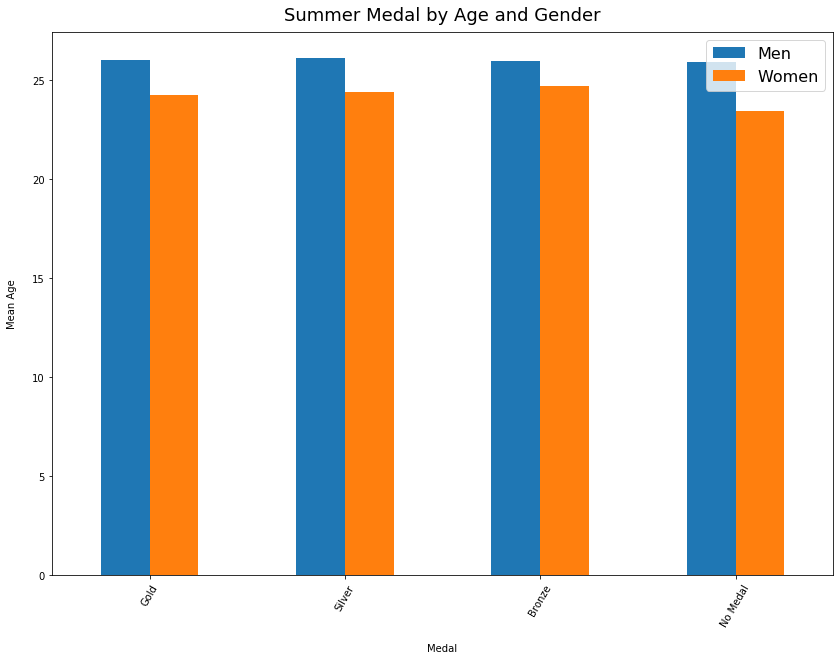

In [42]:
summerage_df.set_index('Medal')[['Males', 'Females']].plot(kind='bar', figsize=(14, 10))
plt.xticks(rotation=60)
plt.title("Summer Medal by Age and Gender", fontsize=18, y=1.01)
plt.xlabel("Medal", labelpad=15)
plt.ylabel("Mean Age", labelpad=15)
plt.legend(["Men", "Women"], fontsize=16);
plt.savefig("../project1-group1/images/summer_age_gender.png")
plt.show()

In [43]:
winter_olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [44]:
winter_age = winter_olympics_clean[["Sex", "Age", "Medal"]]
winter_age

,Sex,Age,Medal
4,F,21.0,No Medal
5,F,21.0,No Medal
6,F,25.0,No Medal
7,F,25.0,No Medal
8,F,27.0,No Medal
...,...,...,...
271111,M,29.0,No Medal
271112,M,27.0,No Medal
271113,M,27.0,No Medal
271114,M,30.0,No Medal


In [45]:
winter_age_male = winter_age.loc[winter_age["Sex"] == "M"]
winter_age_male

,Sex,Age,Medal
10,M,31.0,No Medal
11,M,31.0,No Medal
12,M,31.0,No Medal
13,M,31.0,No Medal
14,M,33.0,No Medal
...,...,...,...
271111,M,29.0,No Medal
271112,M,27.0,No Medal
271113,M,27.0,No Medal
271114,M,30.0,No Medal


In [46]:
winter_age_male.groupby(["Medal"]).mean()

,Age
Medal,
Bronze,26.421594
Gold,26.376076
No Medal,25.350845
Silver,26.306105


In [47]:
winter_age_female = winter_age.loc[winter_age["Sex"] == "F"]
winter_age_female

,Sex,Age,Medal
4,F,21.0,No Medal
5,F,21.0,No Medal
6,F,25.0,No Medal
7,F,25.0,No Medal
8,F,27.0,No Medal
...,...,...,...
271061,F,27.0,No Medal
271062,F,27.0,No Medal
271063,F,27.0,No Medal
271064,F,27.0,No Medal


In [48]:
winter_age_female.groupby(["Medal"]).mean()

,Age
Medal,
Bronze,25.122449
Gold,25.255853
No Medal,23.853980
Silver,25.279264


In [49]:
winterage_df = pd.DataFrame({
    "Males": [26.376076, 26.306105, 26.421594, 25.350845],
    "Females": [25.255853, 25.279264, 25.122449, 23.853980],
    "Medal": ["Gold", "Silver", "Bronze", "No Medal"]
})
winterage_df

,Males,Females,Medal
0,26.376076,25.255853,Gold
1,26.306105,25.279264,Silver
2,26.421594,25.122449,Bronze
3,25.350845,23.853980,No Medal


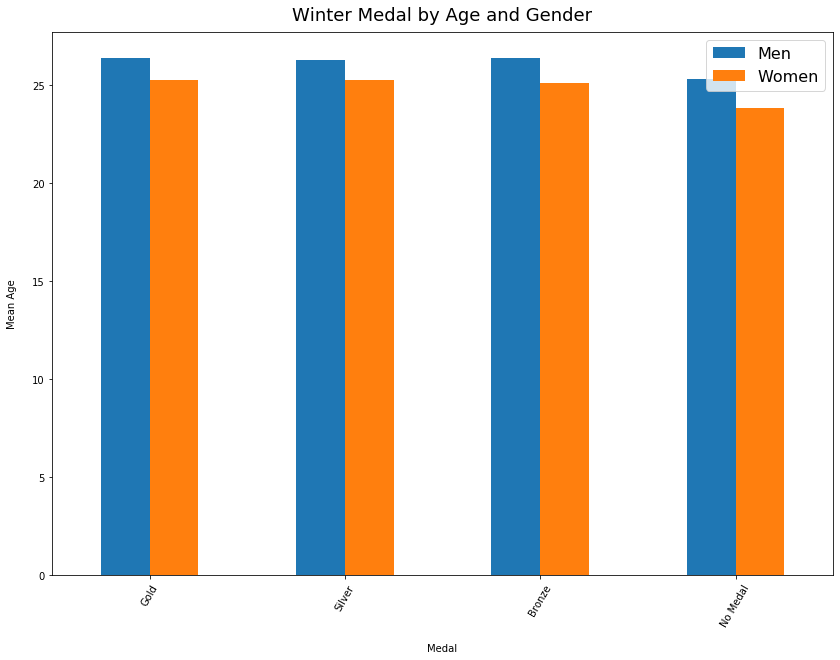

In [50]:
winterage_df.set_index('Medal')[['Males', 'Females']].plot(kind='bar', figsize=(14, 10))
plt.xticks(rotation=60)
plt.title("Winter Medal by Age and Gender", fontsize=18, y=1.01)
plt.xlabel("Medal", labelpad=15)
plt.ylabel("Mean Age", labelpad=15)
plt.legend(["Men", "Women"], fontsize=16);
plt.savefig("../project1-group1/images/winter_age_gender.png")
plt.show()

In [51]:
summer_age2 = summer_olympics_clean[["Year", "Age"]]
summer_age2

,Year,Age
0,1992,24.0
1,2012,23.0
29,1952,26.0
31,2000,31.0
32,1996,30.0
...,...,...
271106,2004,27.0
271107,1972,21.0
271108,2000,24.0
271109,2004,28.0


In [52]:
summer_age2.groupby(["Year"]).mean()

,Age
Year,
1948,29.304796
1952,26.258851
1956,26.033673
1960,25.298760
1964,25.065283
1968,24.255154
1972,24.341103
1976,23.863837
1980,23.704354


In [53]:
summerage2_df = pd.DataFrame({
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    "Average Age": [29.304796, 26.258851, 26.033673, 25.298760, 25.065283, 24.255154, 24.341103, 23.863837, 23.704354, 24.002811, 24.132177, 24.396165, 24.915045, 25.422504, 25.639515, 25.734118, 25.961378, 26.207919]
})
summerage2_df

,Year,Average Age
0,1948,29.304796
1,1952,26.258851
2,1956,26.033673
3,1960,25.298760
4,1964,25.065283
5,1968,24.255154
6,1972,24.341103
7,1976,23.863837
8,1980,23.704354
9,1984,24.002811


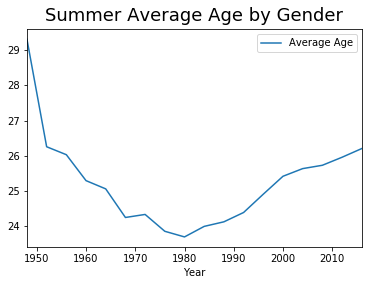

In [54]:
lines = summerage2_df.plot.line(x = "Year", y = "Average Age")
plt.title("Summer Average Age by Gender", fontsize=18, y=1.01)
plt.savefig("../project1-group1/images/summer_age_year.png")

In [55]:
winter_age2 = winter_olympics_clean[["Year", "Age"]]
winter_age2

,Year,Age
4,1988,21.0
5,1988,21.0
6,1992,25.0
7,1992,25.0
8,1994,27.0
...,...,...
271111,1976,29.0
271112,2014,27.0
271113,2014,27.0
271114,1998,30.0


In [56]:
winter_age2.groupby(["Year"]).mean()

,Age
Year,
1948,26.239029
1952,25.446691
1956,25.549922
1960,24.241877
1964,24.419830
1968,24.215812
1972,24.107748
1976,23.739459
1980,23.656160


In [57]:
winterage2_df = pd.DataFrame({
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014],
    "Average Age": [26.239029, 25.446691, 25.549922, 24.241877, 24.419830, 24.215812, 24.107748, 23.739459, 23.656160, 23.443241, 23.840607, 24.027948, 24.422103, 25.163197, 25.916281, 25.959151, 26.124262, 25.987324]
})
winterage2_df

,Year,Average Age
0,1948,26.239029
1,1952,25.446691
2,1956,25.549922
3,1960,24.241877
4,1964,24.419830
5,1968,24.215812
6,1972,24.107748
7,1976,23.739459
8,1980,23.656160
9,1984,23.443241


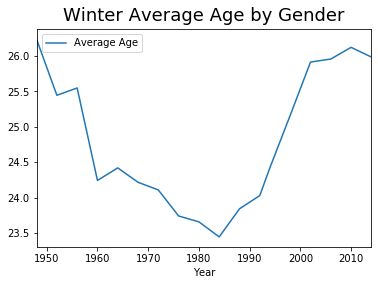

In [58]:
lines = winterage2_df.plot.line(x = "Year", y = "Average Age")
plt.title("Winter Average Age by Gender", fontsize=18, y=1.01)
plt.savefig("../project1-group1/images/winter_age_year.png")

In [59]:
summer_olympics_phys = summer_olympics_clean[["Year", "Sex", "Height", "Weight"]]
summer_olympics_phys

,Year,Sex,Height,Weight
0,1992,M,180.0,80.0
1,2012,M,170.0,60.0
29,1952,M,NaN,NaN
31,2000,M,172.0,70.0
32,1996,F,159.0,55.5
...,...,...,...,...
271106,2004,M,168.0,76.0
271107,1972,M,175.0,75.0
271108,2000,M,183.0,72.0
271109,2004,M,183.0,72.0


In [60]:
summer_phys_male = summer_olympics_phys.loc[summer_olympics_phys["Sex"] == "M"]

In [61]:
summer_phys_male.groupby(["Year"]).mean()

,Height,Weight
Year,,
1948,177.662651,73.519954
1952,176.670747,72.980440
1956,176.722735,73.467120
1960,175.573425,72.089147
1964,175.768508,72.275173
1968,176.536990,72.677614
1972,177.339033,73.727723
1976,177.869338,74.275097
1980,178.649961,74.744811


In [62]:
summerheight_df = pd.DataFrame({
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    "Male Average Height": [177.662651, 176.670747, 176.722735, 175.573425, 175.768508, 176.536990, 177.339033, 177.869338, 178.649961, 178.637322, 179.121398, 179.871763, 180.133290, 180.704091, 180.891246, 181.253646, 181.633557, 181.547852],
    "Female Average Height": [168.834646, 164.099256, 163.882353, 163.256336, 164.278824, 164.957555, 165.215130, 167.077030, 166.957077, 167.427088, 167.743348, 168.704888, 168.337929, 168.972903, 168.979949, 169.508927, 169.732233, 169.445906]
})
summerheight_df

,Year,Male Average Height,Female Average Height
0,1948,177.662651,168.834646
1,1952,176.670747,164.099256
2,1956,176.722735,163.882353
3,1960,175.573425,163.256336
4,1964,175.768508,164.278824
5,1968,176.536990,164.957555
6,1972,177.339033,165.215130
7,1976,177.869338,167.077030
8,1980,178.649961,166.957077
9,1984,178.637322,167.427088


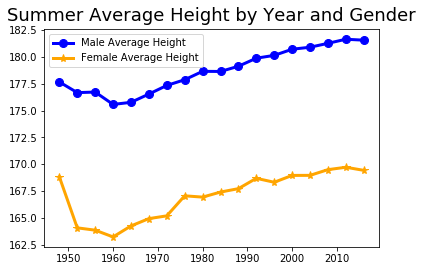

In [63]:
plt.plot("Year", "Male Average Height", data=summerheight_df, marker='o', color='blue', markersize=8, linewidth=3)
plt.plot("Year", "Female Average Height", data=summerheight_df, marker='*', color='orange', markersize=8, linewidth=3)
plt.title("Summer Average Height by Year and Gender", fontsize=18, y=1.01)
plt.legend()
plt.savefig("../project1-group1/images/summerheight.png")

In [64]:
summerweight_df = pd.DataFrame({
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    "Male Average Weight": [73.519954, 72.980440, 73.467120, 72.089147, 72.275173, 72.677614, 73.727723, 74.275097, 74.744811, 74.502139, 75.218985, 76.267776, 77.250529, 77.802459, 78.372140, 78.659909, 78.937328, 78.560267],
    "Female Average Weight": [60.504098, 58.092405, 58.438298, 57.476812, 57.986436, 57.425863, 56.548054, 58.132776, 58.466667, 58.017716, 58.658551, 59.650841, 59.373293, 60.811676, 61.205670, 61.683432, 62.053820, 61.931333]
})
summerweight_df

,Year,Male Average Weight,Female Average Weight
0,1948,73.519954,60.504098
1,1952,72.980440,58.092405
2,1956,73.467120,58.438298
3,1960,72.089147,57.476812
4,1964,72.275173,57.986436
5,1968,72.677614,57.425863
6,1972,73.727723,56.548054
7,1976,74.275097,58.132776
8,1980,74.744811,58.466667
9,1984,74.502139,58.017716


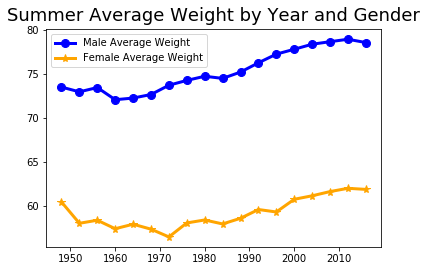

In [65]:
plt.plot("Year", "Male Average Weight", data=summerweight_df, marker='o', color='blue', markersize=8, linewidth=3)
plt.plot("Year", "Female Average Weight", data=summerweight_df, marker='*', color='orange', markersize=8, linewidth=3)
plt.title("Summer Average Weight by Year and Gender", fontsize=18, y=1.01)
plt.legend()
plt.savefig("../project1-group1/images/summerweight.png")

In [66]:
summer_phys_female = summer_olympics_phys.loc[summer_olympics_phys["Sex"] == "F"]

In [67]:
summer_phys_female.groupby(["Year"]).mean()

,Height,Weight
Year,,
1948,168.834646,60.504098
1952,164.099256,58.092405
1956,163.882353,58.438298
1960,163.256336,57.476812
1964,164.278824,57.986436
1968,164.957555,57.425863
1972,165.215130,56.548054
1976,167.077030,58.132776
1980,166.957077,58.466667


In [68]:
winter_olympics_phys = winter_olympics_clean[["Year", "Sex", "Height", "Weight"]]
winter_olympics_phys

,Year,Sex,Height,Weight
4,1988,F,185.0,82.0
5,1988,F,185.0,82.0
6,1992,F,185.0,82.0
7,1992,F,185.0,82.0
8,1994,F,185.0,82.0
...,...,...,...,...
271111,1976,M,179.0,89.0
271112,2014,M,176.0,59.0
271113,2014,M,176.0,59.0
271114,1998,M,185.0,96.0


In [69]:
winter_phys_male = winter_olympics_phys.loc[winter_olympics_phys["Sex"] == "M"]

In [70]:
winter_phys_male.groupby(["Year"]).mean()

,Height,Weight
Year,,
1948,173.414141,70.541667
1952,174.304688,70.929134
1956,173.913495,72.942105
1960,173.931472,71.835106
1964,174.740421,73.168610
1968,175.723600,73.593281
1972,176.451797,73.289152
1976,176.865290,74.330816
1980,178.100000,75.315459


In [71]:
winter_phys_female = winter_olympics_phys.loc[winter_olympics_phys["Sex"] == "F"]

In [72]:
winter_phys_female.groupby(["Year"]).mean()

,Height,Weight
Year,,
1948,165.764706,55.733333
1952,169.090909,59.159091
1956,164.654545,58.614035
1960,161.739437,57.911765
1964,163.590062,58.895570
1968,164.837438,58.657960
1972,164.631961,58.214286
1976,165.469325,58.322006
1980,165.701149,57.697640


In [73]:
winterheight_df = pd.DataFrame({
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014],
    "Male Average Height": [173.414141, 174.304688, 173.913495, 173.931472, 174.740421, 175.723600, 176.451797, 176.865290, 178.100000, 178.619113, 179.276455, 179.322344, 179.442791, 179.559041, 179.715706, 179.845361, 180.432824, 180.261738],
    "Female Average Height": [165.764706, 169.090909, 164.654545, 161.739437, 163.590062, 164.837438, 164.631961, 165.469325, 165.701149, 165.795132, 166.736328, 166.808924, 167.037109, 166.605322, 166.646006, 166.838930, 167.295615, 167.112048]
})
winterheight_df

,Year,Male Average Height,Female Average Height
0,1948,173.414141,165.764706
1,1952,174.304688,169.090909
2,1956,173.913495,164.654545
3,1960,173.931472,161.739437
4,1964,174.740421,163.590062
5,1968,175.723600,164.837438
6,1972,176.451797,164.631961
7,1976,176.865290,165.469325
8,1980,178.100000,165.701149
9,1984,178.619113,165.795132


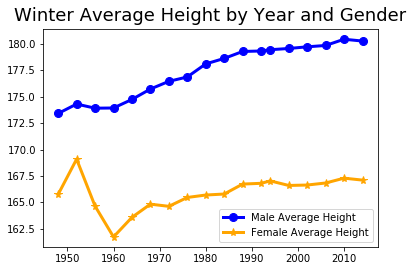

In [74]:
plt.plot("Year", "Male Average Height", data=winterheight_df, marker='o', color='blue', markersize=8, linewidth=3)
plt.plot("Year", "Female Average Height", data=winterheight_df, marker='*', color='orange', markersize=8, linewidth=3)
plt.title("Winter Average Height by Year and Gender", fontsize=18, y=1.01)
plt.legend()
plt.savefig("../project1-group1/images/winterheight.png")

In [75]:
winterweight_df = pd.DataFrame({
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014],
    "Male Average Weight": [70.541667, 70.929134, 72.942105, 71.835106, 73.168610, 73.593281, 73.289152, 74.330816, 75.315459, 75.398022, 76.349270, 76.664398, 77.232033, 77.853619, 78.024741, 77.349024, 77.963007, 77.901562],
    "Female Average Weight": [55.733333, 59.159091, 58.614035, 57.911765, 58.895570, 58.657960, 58.214286, 58.322006, 57.697640, 58.184426, 59.217773, 58.979381, 59.313294, 59.841852, 60.200835, 60.339133, 60.750953, 60.520313]
})
winterweight_df

,Year,Male Average Weight,Female Average Weight
0,1948,70.541667,55.733333
1,1952,70.929134,59.159091
2,1956,72.942105,58.614035
3,1960,71.835106,57.911765
4,1964,73.168610,58.895570
5,1968,73.593281,58.657960
6,1972,73.289152,58.214286
7,1976,74.330816,58.322006
8,1980,75.315459,57.697640
9,1984,75.398022,58.184426


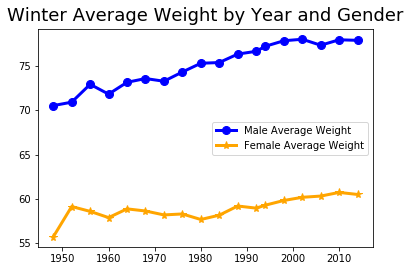

In [76]:
plt.plot("Year", "Male Average Weight", data=winterweight_df, marker='o', color='blue', markersize=8, linewidth=3)
plt.plot("Year", "Female Average Weight", data=winterweight_df, marker='*', color='orange', markersize=8, linewidth=3)
plt.title("Winter Average Weight by Year and Gender", fontsize=18, y=1.01)
plt.legend()
plt.savefig("../project1-group1/images/winterweight.png")